#### Libraries

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import random
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score
from sklearn.model_selection import GridSearchCV
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor
import ipywidgets as widgets
import plotly.graph_objects as go

**date** = Date and time of the observation  
**p** = Atmospheric pressure in millibars (mbar)  
**T** = Air temperature in degrees Celsius (°C)  
**Tpot** = Potential temperature in Kelvin (K)  
**Tdew** = Dew point temperature in degrees Celsius (°C)  
**rh** = Relative humidity as a percentage (%)  
**VPmax** = Maximum vapor pressure in millibars (mbar)  
**VPact** = Actual vapor pressure in millibars (mbar)  
**VPdef** = Vapor pressure deficit in millibars (mbar)  
**sh** = Specific humidity in grams per kilogram (g/kg)  
**H2OC** = Water vapor in mmol/mol of dry air  
**rho** = Air density in grams per cubic meter (g/m³)  
**wv** = Wind speed in meters per second (m/s)  
**max.wv** = Maximum wind speed in meters per second  
**wd** = Wind direction in degrees (°)  
**rain** = Total rainfall in millimeters (mm)  
**raining** = Duration of rainfall in seconds (s)  
**SWDR** = Short-wave downward radiation (W/m²)  
**PAR** = Photosynthetically active radiation (µmol/m²/s)  
**max.PAR** = Maximum photosynthetically active radiation (µmol/m²/s)  
**Tlog** = Temperature logged in degrees Celsius (°C)  
**OT** = Operational timestamp (if present)  

In [11]:
Weather = pd.read_csv(r"C:\Users\Van_P\OneDrive\Masaüstü\Projects\LTSM\weather.csv",delimiter=',',encoding='iso-8859-1',dtype={'model':str,'transmission':str,'fuelType':str})
Weather.rename(columns={'max. wv': 'max.wv','max. PAR':'max.PAR'}, inplace=True)
cols = [col for col in Weather.columns if col != "T"]
new_order = cols + ["T"]
Weather = Weather[new_order]
with pd.option_context('display.max_columns', None): #,'display.max_rows', None):
    display(Weather)

,date,p,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,max.wv,wd,rain,raining,SWDR,PAR,max.PAR,Tlog,T
0,2020-01-01 00:10:00,1008.89,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,5.49,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45,0.71
1,2020-01-01 00:20:00,1008.76,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,5.45,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51,0.75
2,2020-01-01 00:30:00,1008.66,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,5.43,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60,0.73
3,2020-01-01 00:40:00,1008.64,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,5.37,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70,0.37
4,2020-01-01 00:50:00,1008.61,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,5.42,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81,0.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52691,2020-12-31 23:20:00,978.32,277.16,-0.80,80.0,7.20,5.76,1.44,3.67,5.89,1234.61,0.73,1.40,180.6,0.0,0.0,0.0,0.0,0.0,13.40,2.28
52692,2020-12-31 23:30:00,978.30,277.01,-0.43,83.1,7.12,5.92,1.20,3.77,6.05,1235.20,0.43,0.82,174.0,0.0,0.0,0.0,0.0,0.0,13.42,2.13
52693,2020-12-31 23:40:00,978.26,276.88,-0.71,82.2,7.05,5.80,1.26,3.69,5.93,1235.82,0.38,0.76,248.9,0.0,0.0,0.0,0.0,0.0,13.45,1.99
52694,2020-12-31 23:50:00,978.26,276.95,-0.77,81.4,7.09,5.77,1.32,3.68,5.90,1235.49,0.57,1.07,196.6,0.0,0.0,0.0,0.0,0.0,13.47,2.07


In [12]:
Weather.describe()

,p,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,H2OC,rho,wv,max.wv,wd,rain,raining,SWDR,PAR,max.PAR,Tlog,T
count,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000,52696.000000
mean,989.989233,284.796938,5.409105,72.487133,14.487046,9.676828,4.810131,6.111159,9.782341,1210.882855,1.995935,3.632807,176.850276,0.011773,25.907469,131.331822,259.863438,308.601939,21.515206,10.818241
std,9.207149,7.616995,5.956722,19.230260,7.632960,4.023504,5.539320,2.561536,4.082684,36.430222,43.596931,2.462467,81.194840,0.123289,111.503420,215.735116,422.786515,569.956762,7.790620,7.468671
min,955.580000,266.190000,-13.810000,21.160000,3.770000,2.090000,0.000000,1.300000,2.090000,1107.380000,-9999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,6.900000,-6.440000
25%,984.800000,278.550000,0.777500,58.820000,8.480000,6.460000,1.170000,4.070000,6.530000,1183.900000,1.000000,1.770000,141.100000,0.000000,0.000000,0.000000,0.000000,0.000000,15.240000,4.590000
50%,990.920000,284.320000,5.260000,75.400000,12.480000,8.890000,2.740000,5.610000,8.990000,1210.800000,1.770000,3.000000,195.500000,0.000000,0.000000,2.820000,9.670000,13.120000,20.440000,10.230000
75%,995.930000,290.260000,9.700000,87.900000,18.420000,12.050000,6.440000,7.620000,12.200000,1236.550000,2.920000,4.850000,226.700000,0.000000,0.000000,182.900000,366.437500,434.260000,26.822500,16.180000
max,1020.070000,309.130000,20.500000,100.000000,55.670000,24.160000,42.100000,15.400000,24.530000,1318.520000,13.770000,22.900000,360.000000,11.200000,600.000000,1115.290000,2131.760000,2498.940000,49.090000,34.800000


In [13]:
for col in Weather.columns:
    unique_count = Weather[col].nunique()
    print(f"{col} = {unique_count} unique")
#Weather.info()
#Weather.isnull().sum()

date = 52695 unique
p = 5052 unique
Tpot = 3836 unique
Tdew = 3036 unique
rh = 5494 unique
VPmax = 2958 unique
VPact = 2059 unique
VPdef = 2793 unique
sh = 1337 unique
H2OC = 2087 unique
rho = 14826 unique
wv = 977 unique
max.wv = 1367 unique
wd = 8099 unique
rain = 42 unique
raining = 61 unique
SWDR = 16767 unique
PAR = 19508 unique
max.PAR = 19004 unique
Tlog = 3716 unique
T = 3680 unique


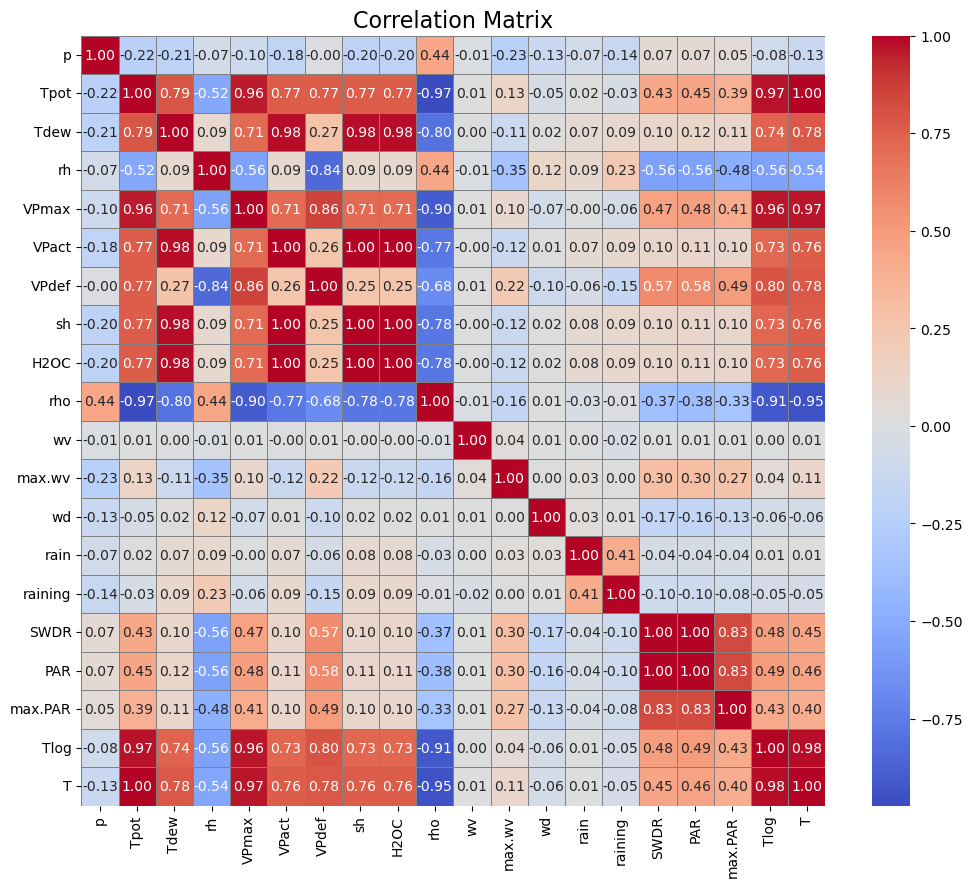

In [14]:
#Correlation Matrix
numeric_columns = Weather.select_dtypes(include='number').columns.tolist()
corr = Weather[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [15]:
# Step 1: Calculate absolute correlations with the target variable
target_corr = Weather[numeric_columns].corr()["T"].abs()

# Step 2: Filter features that are strongly correlated with the target
strong_to_target = target_corr[target_corr > 0.6].index.tolist()

# Step 3: Calculate correlation matrix among the strong features
subset_corr = Weather[strong_to_target].corr().abs()

# Step 4: Find feature pairs that are very similar (i.e., redundant)
redundants = []
for col in subset_corr.columns:
    for idx in subset_corr.index:
        if col != idx and subset_corr.loc[idx, col] > 0.95:
            redundants.append((col, idx))

# Step 5: Remove duplicates like (A, B) and (B, A)
unique_redundants = set(tuple(sorted(pair)) for pair in redundants)

# Step 6: Display results
print("🔁 Highly correlated feature pairs among those strongly related to 'T':\n")
for f1, f2 in sorted(unique_redundants):
    r = subset_corr.loc[f1, f2]
    print(f"{f1:<15} ↔ {f2:<15} : correlation = {r:.2f}")


🔁 Highly correlated feature pairs among those strongly related to 'T':

H2OC            ↔ Tdew            : correlation = 0.98
H2OC            ↔ VPact           : correlation = 1.00
H2OC            ↔ sh              : correlation = 1.00
T               ↔ Tlog            : correlation = 0.98
T               ↔ Tpot            : correlation = 1.00
T               ↔ VPmax           : correlation = 0.97
Tdew            ↔ VPact           : correlation = 0.98
Tdew            ↔ sh              : correlation = 0.98
Tlog            ↔ Tpot            : correlation = 0.97
Tlog            ↔ VPmax           : correlation = 0.96
Tpot            ↔ VPmax           : correlation = 0.96
Tpot            ↔ rho             : correlation = 0.97
VPact           ↔ sh              : correlation = 1.00


In [16]:
def plot_binned_value_counts(column, bins=50):
    # Binleme yap
    binned = pd.cut(Weather[column], bins=bins)
    
    # Say
    counts = binned.value_counts().sort_index()
    
    # Plot
    fig = px.bar(
        x=counts.index.astype(str),
        y=counts.values,
        labels={'x': f'{column} range', 'y': 'Count'},
        title=f"Binned Value Counts for '{column}' (Bins={bins})"
    )
    
    fig.update_traces(
        hovertemplate=f"<b>{column} range</b>: %{{x}}<br><b>Count</b>: %{{y}}<extra></extra>"
    )
    
    # Çerçeve ve arka plan ayarları
    fig.update_layout(
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            showline=True,
            linecolor='black',
            linewidth=2,
            mirror=True
        ),
        yaxis=dict(
            showline=True,
            linecolor='black',
            linewidth=2,
            mirror=True
        )
    )
    
    fig.show()

@widgets.interact(column=numeric_columns)
def show_value_counts(column):
    plot_binned_value_counts(column)

interactive(children=(Dropdown(description='column', options=('p', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VP…

In [17]:
@widgets.interact(column=numeric_columns)
def show_outliers_box(column):
    fig = go.Figure()

    fig.add_trace(go.Box(
        x=Weather[column],
        boxpoints="outliers",
        fillcolor="#87CEEB",          # kutunun içi
        marker_color="black",       # outlier noktaları
        line=dict(color="black"),  # ← kutu çizgisi ve medyan çizgisi siyah
        opacity=1,
        name=column,
        orientation="h"
    ))

    fig.update_layout(
        title=f"Outlier Boxplot: {column}",
        width=900,
        height=600,
        plot_bgcolor='white',
        paper_bgcolor='white',
        xaxis=dict(
            showline=True,
            linewidth=2,
            linecolor='black',
            mirror=True
        ),
        yaxis=dict(
            showline=True,
            linewidth=2,
            linecolor='black',
            mirror=True
        )
    )

    fig.show()

interactive(children=(Dropdown(description='column', options=('p', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VP…

In [18]:
pd.set_option('display.float_format', '{:.8f}'.format)
# Step 1: Split the data
X = Weather[numeric_columns].drop(columns=["T","VPmax","Tpot","Tlog","rho"])
y = Weather["T"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Train the model
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Step 3: Get feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns)
important_features = importances.sort_values(ascending=False)
important_features

VPdef     0.38844892
H2OC      0.37028163
sh        0.11397791
Tdew      0.06582283
VPact     0.06094854
p         0.00014266
rh        0.00013478
max.wv    0.00012208
wv        0.00006360
wd        0.00002368
max.PAR   0.00001150
SWDR      0.00001127
PAR       0.00000950
raining   0.00000077
rain      0.00000032
dtype: float64

In [19]:
Weather2 = Weather.drop(columns=["VPmax","Tpot","Tlog","rho"])

Weather2["date"] = pd.to_datetime(Weather2["date"])
Weather2.set_index("date", inplace=True)
Weather2

Weather2["hour"] = Weather2.index.hour
Weather2["month"] = Weather2.index.month
Weather2["month_name"] = Weather2.index.month_name() 
Weather2["season"] = (Weather2.index.month % 12) // 3
season_map = {
    0: "Winter",
    1: "Spring",
    2: "Summer",
    3: "Autumn"
}
Weather2["season_name"] = Weather2["season"].map(season_map)
Weather2

,p,Tdew,rh,VPact,VPdef,sh,H2OC,wv,max.wv,wd,...,raining,SWDR,PAR,max.PAR,T,hour,month,month_name,season,season_name
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:10:00,1008.89000000,-1.33000000,86.10000000,5.54000000,0.89000000,3.42000000,5.49000000,1.02000000,1.60000000,224.30000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.71000000,0,1,January,0,Winter
2020-01-01 00:20:00,1008.76000000,-1.44000000,85.20000000,5.49000000,0.95000000,3.39000000,5.45000000,0.43000000,0.84000000,206.80000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.75000000,0,1,January,0,Winter
2020-01-01 00:30:00,1008.66000000,-1.48000000,85.10000000,5.48000000,0.96000000,3.39000000,5.43000000,0.61000000,1.48000000,197.10000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.73000000,0,1,January,0,Winter
2020-01-01 00:40:00,1008.64000000,-1.64000000,86.30000000,5.41000000,0.86000000,3.35000000,5.37000000,1.11000000,1.48000000,206.40000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.37000000,0,1,January,0,Winter
2020-01-01 00:50:00,1008.61000000,-1.50000000,87.40000000,5.47000000,0.79000000,3.38000000,5.42000000,0.49000000,1.40000000,209.60000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.33000000,0,1,January,0,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:20:00,978.32000000,-0.80000000,80.00000000,5.76000000,1.44000000,3.67000000,5.89000000,0.73000000,1.40000000,180.60000000,...,0.00000000,0.00000000,0.00000000,0.00000000,2.28000000,23,12,December,0,Winter
2020-12-31 23:30:00,978.30000000,-0.43000000,83.10000000,5.92000000,1.20000000,3.77000000,6.05000000,0.43000000,0.82000000,174.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,2.13000000,23,12,December,0,Winter
2020-12-31 23:40:00,978.26000000,-0.71000000,82.20000000,5.80000000,1.26000000,3.69000000,5.93000000,0.38000000,0.76000000,248.90000000,...,0.00000000,0.00000000,0.00000000,0.00000000,1.99000000,23,12,December,0,Winter


In [20]:
monthly_temp_stats = Weather2.groupby("month_name")["T"].agg(["max", "min", "mean"])
monthly_temp_stats = monthly_temp_stats.loc[
    ["January", "February", "March", "April", "May", "June",
     "July", "August", "September", "October", "November", "December"]
]
monthly_temp_stats.columns = ["Max (°C)", "Min (°C)", "Mean (°C)"]

monthly_temp_stats

,Max (°C),Min (°C),Mean (°C)
month_name,,,
January,14.02000000,-6.44000000,3.46480959
February,17.16000000,-1.59000000,5.75783285
March,17.57000000,-5.66000000,5.38652330
April,22.79000000,-6.40000000,10.39246759
May,24.11000000,-2.06000000,11.88216562
June,29.44000000,7.39000000,17.36495602
July,28.62000000,8.12000000,18.95744176
August,34.80000000,9.60000000,20.75607751
September,30.16000000,2.68000000,15.40912269


In [21]:
#Grouping data by hour
Weather2 = Weather2.groupby([Weather2.index.date, Weather2.index.hour]).first()
Weather2.index = pd.to_datetime(Weather2.index.map(lambda x: f"{x[0]} {x[1]}:00"))
Weather2.head(25)

,p,Tdew,rh,VPact,VPdef,sh,H2OC,wv,max.wv,wd,...,raining,SWDR,PAR,max.PAR,T,hour,month,month_name,season,season_name
2020-01-01 00:00:00,1008.89000000,-1.33000000,86.10000000,5.54000000,0.89000000,3.42000000,5.49000000,1.02000000,1.60000000,224.30000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.71000000,0,1,January,0,Winter
2020-01-01 01:00:00,1008.44000000,-1.54000000,87.10000000,5.45000000,0.81000000,3.37000000,5.41000000,0.63000000,1.32000000,188.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,0.34000000,1,1,January,0,Winter
2020-01-01 02:00:00,1008.32000000,-1.78000000,89.10000000,5.36000000,0.66000000,3.31000000,5.31000000,0.50000000,1.00000000,154.00000000,...,0.00000000,0.00000000,0.00000000,0.00000000,-0.21000000,2,1,January,0,Winter
2020-01-01 03:00:00,1008.46000000,-1.71000000,88.50000000,5.39000000,0.70000000,3.33000000,5.34000000,0.46000000,1.14000000,46.51000000,...,0.00000000,0.00000000,0.00000000,0.00000000,-0.05000000,3,1,January,0,Winter
2020-01-01 04:00:00,1008.00000000,-2.31000000,90.90000000,5.15000000,0.52000000,3.19000000,5.11000000,1.83000000,2.64000000,218.10000000,...,0.00000000,0.00000000,0.00000000,0.00000000,-1.02000000,4,1,January,0,Winter
2020-01-01 05:00:00,1007.63000000,-2.78000000,93.20000000,4.97000000,0.36000000,3.08000000,4.94000000,1.53000000,2.20000000,226.90000000,...,0.00000000,0.00000000,0.00000000,0.00000000,-1.84000000,5,1,January,0,Winter
2020-01-01 06:00:00,1007.81000000,-3.34000000,94.00000000,4.77000000,0.30000000,2.95000000,4.74000000,0.85000000,2.12000000,177.90000000,...,0.00000000,0.00000000,0.00000000,0.00000000,-2.51000000,6,1,January,0,Winter
2020-01-01 07:00:00,1008.17000000,-2.94000000,95.00000000,4.91000000,0.26000000,3.04000000,4.87000000,0.95000000,1.76000000,218.20000000,...,0.00000000,0.00000000,0.00000000,0.00000000,-2.26000000,7,1,January,0,Winter
2020-01-01 08:00:00,1008.16000000,-3.60000000,94.50000000,4.68000000,0.27000000,2.89000000,4.64000000,1.37000000,2.26000000,131.00000000,...,0.00000000,0.00000000,1.54000000,2.51000000,-2.84000000,8,1,January,0,Winter
2020-01-01 09:00:00,1008.07000000,-3.90000000,94.00000000,4.57000000,0.29000000,2.83000000,4.54000000,1.02000000,1.92000000,189.60000000,...,0.00000000,34.21000000,70.27000000,83.01000000,-3.08000000,9,1,January,0,Winter


In [22]:
from sklearn.preprocessing import MinMaxScaler
Final = Weather2.copy()

# Sayısal kolonları seç (T hariç)
feature_cols = Final.select_dtypes(include='number').drop(columns=["T","hour","month","season"]).columns

# Scaler oluştur ve uygula
scaler = MinMaxScaler()
Final[feature_cols] = scaler.fit_transform(Final[feature_cols])

# Target scaler (T için ayrı)
target_scaler = MinMaxScaler()
Final["T"] = target_scaler.fit_transform(Final[["T"]])

# Sin/Cos dönüşümleri
Final["hour_sin"] = np.sin(2 * np.pi * Final["hour"] / 24)
Final["hour_cos"] = np.cos(2 * np.pi * Final["hour"] / 24)

Final["month_sin"] = np.sin(2 * np.pi * Final["month"] / 12)
Final["month_cos"] = np.cos(2 * np.pi * Final["month"] / 12)

Final["season_sin"] = np.sin(2 * np.pi * Final["season"] / 4)
Final["season_cos"] = np.cos(2 * np.pi * Final["season"] / 4)

Final.drop(columns=["hour", "month", "season", "month_name", "season_name"], inplace=True)
Final.head(25)

,p,Tdew,rh,VPact,VPdef,sh,H2OC,wv,max.wv,wd,...,SWDR,PAR,max.PAR,T,hour_sin,hour_cos,month_sin,month_cos,season_sin,season_cos
2020-01-01 00:00:00,0.82661290,0.35825359,0.82369356,0.15678955,0.02162293,0.15113720,0.15253456,0.06866326,0.07131941,0.62318679,...,0.00000000,0.00000000,0.80035475,0.17289377,0.00000000,1.00000000,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 01:00:00,0.81963400,0.35197368,0.83637747,0.15258983,0.01967930,0.14746882,0.14884793,0.04017531,0.05705553,0.52231423,...,0.00000000,0.00000000,0.80035475,0.16385836,0.25881905,0.96592583,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 02:00:00,0.81777295,0.34479665,0.86174531,0.14839011,0.01603499,0.14306676,0.14423963,0.03067933,0.04075395,0.42783305,...,0.00000000,0.00000000,0.80035475,0.15042735,0.50000000,0.86602540,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 03:00:00,0.81994417,0.34688995,0.85413496,0.14979001,0.01700680,0.14453412,0.14562212,0.02775749,0.04788589,0.12913355,...,0.00000000,0.00000000,0.80035475,0.15433455,0.70710678,0.70710678,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 04:00:00,0.81281017,0.32894737,0.88457636,0.13859076,0.01263362,0.13426266,0.13502304,0.12783053,0.12429954,0.60595787,...,0.00000000,0.00000000,0.80035475,0.13064713,0.86602540,0.50000000,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 05:00:00,0.80707196,0.31489234,0.91374937,0.13019132,0.00874636,0.12619222,0.12718894,0.10591673,0.10188487,0.63041183,...,0.00000000,0.00000000,0.80035475,0.11062271,0.96592583,0.25881905,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 06:00:00,0.80986352,0.29814593,0.92389650,0.12085861,0.00728863,0.11665444,0.11797235,0.05624543,0.09780948,0.49424776,...,0.00000000,0.00000000,0.80035475,0.09426129,1.00000000,0.00000000,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 07:00:00,0.81544665,0.31010766,0.93658042,0.12739151,0.00631681,0.12325752,0.12396313,0.06355004,0.07947020,0.60623576,...,0.00000000,0.00000000,0.80035475,0.10036630,0.96592583,-0.25881905,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 08:00:00,0.81529156,0.29037081,0.93023846,0.11665889,0.00655977,0.11225238,0.11336406,0.09422936,0.10494142,0.36391930,...,0.00000000,0.00076559,0.80055566,0.08620269,0.86602540,-0.50000000,0.50000000,0.86602540,0.00000000,1.00000000
2020-01-01 09:00:00,0.81389578,0.28139952,0.92389650,0.11152590,0.00704568,0.10785033,0.10875576,0.06866326,0.08762099,0.52676041,...,0.03341016,0.03493378,0.80699916,0.08034188,0.70710678,-0.70710678,0.50000000,0.86602540,0.00000000,1.00000000


In [23]:
X = Final.drop(columns=["T"])
y = Final["T"]

In [24]:
#Standard 24 Hour
def create_sliding_sequences(X, y, window_size=24):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X.iloc[i:i+window_size].values)
        ys.append(y.iloc[i+window_size])
    return np.array(Xs), np.array(ys)

X_seq1, y_seq1 = create_sliding_sequences(X, y, window_size=24)

In [25]:
#Test-Train Split
X_train1, y_train1 = X_seq1[:6500], y_seq1[:6500]
X_val1, y_val1 = X_seq1[6500:7400], y_seq1[6500:7400]
X_test1, y_test1 = X_seq1[7400:], y_seq1[7400:]

In [26]:
from tensorflow.keras.layers import Input
def build_lstm_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(32, activation='relu'),
        Dropout(0.15),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse',metrics=['mae', 'mse'])
    return model

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping 
early_stop = EarlyStopping(
    monitor='val_loss',     
    patience=10,             
    restore_best_weights=True 
)

#Training
model1 = build_lstm_model((24, 21))
history1 = model1.fit(X_train1, y_train1, epochs=60, validation_data=(X_val1, y_val1), batch_size=64,callbacks=[early_stop])

#Prediction
y_pred1 = model1.predict(X_test1)

Epoch 1/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0425 - mae: 0.1436 - mse: 0.0425 - val_loss: 0.0030 - val_mae: 0.0448 - val_mse: 0.0030
Epoch 2/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0075 - mae: 0.0677 - mse: 0.0075 - val_loss: 0.0021 - val_mae: 0.0374 - val_mse: 0.0021
Epoch 3/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0054 - mae: 0.0574 - mse: 0.0054 - val_loss: 0.0023 - val_mae: 0.0396 - val_mse: 0.0023
Epoch 4/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0051 - mae: 0.0555 - mse: 0.0051 - val_loss: 0.0019 - val_mae: 0.0346 - val_mse: 0.0019
Epoch 5/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0044 - mae: 0.0519 - mse: 0.0044 - val_loss: 0.0025 - val_mae: 0.0400 - val_mse: 0.0025
Epoch 6/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0043 - mae: 0.0509 - mse: 0.0043 - val_loss: 0.0018 - val_mae: 0.0338 - val_mse: 0.0018
Epoch 7/60
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0037 - mae: 0.0472 - mse: 0.003

In [28]:
# Reversing normalization
y_pred1_inv = target_scaler.inverse_transform(y_pred1)
y_test1_inv = target_scaler.inverse_transform(y_test1.reshape(-1, 1))

In [29]:
#Error Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test1_inv, y_pred1_inv)
mae = mean_absolute_error(y_test1_inv, y_pred1_inv)
r2 = r2_score(y_test1_inv, y_pred1_inv)

print(f" MSE: {mse:.3f}")
print(f" MAE: {mae:.3f}")
print(f" R²: {r2:.3f}")


 MSE: 0.855
 MAE: 0.726
 R²: 0.941


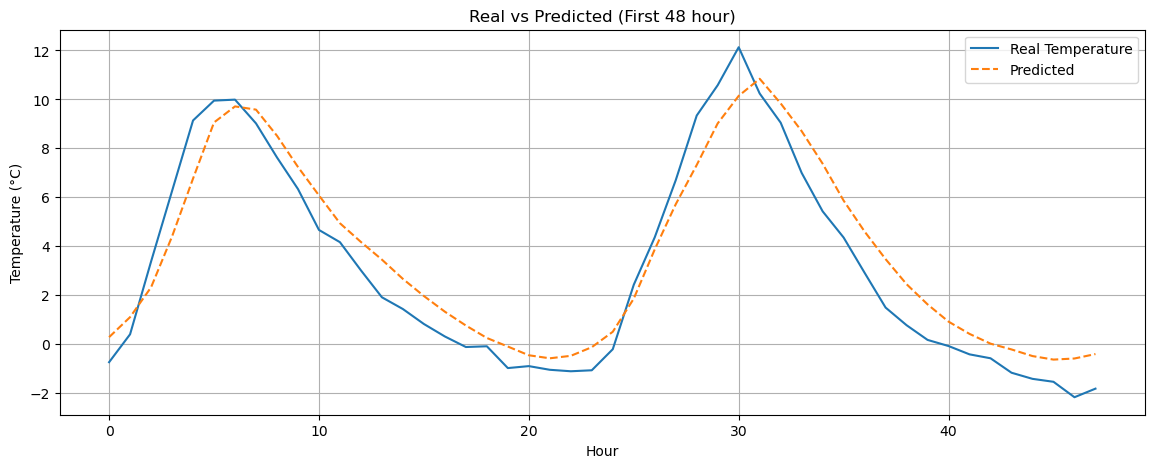

In [30]:
plt.figure(figsize=(14, 5))
plt.plot(y_test1_inv[:48], label="Real Temperature")
plt.plot(y_pred1_inv[:48], label="Predicted", linestyle="--")
plt.title("Real vs Predicted (First 48 hour)")
plt.xlabel("Hour")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

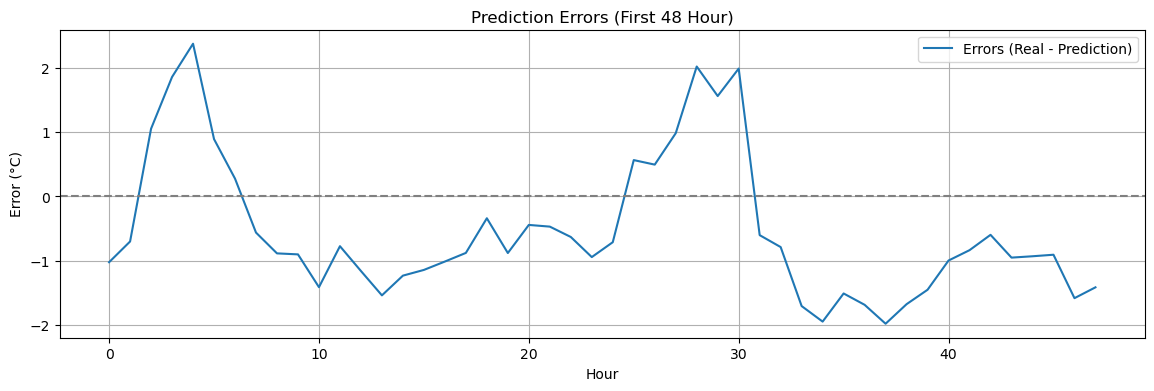

In [31]:
plt.figure(figsize=(14, 4))
plt.plot(y_test1_inv[:48] - y_pred1_inv[:48], label="Errors (Real - Prediction)")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Prediction Errors (First 48 Hour)")
plt.xlabel("Hour")
plt.ylabel("Error (°C)")
plt.legend()
plt.grid(True)
plt.show()

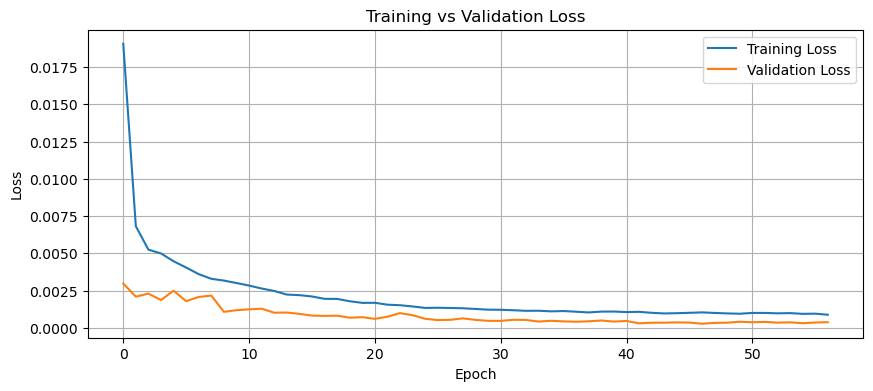

In [32]:
plt.figure(figsize=(10, 4))
plt.plot(history1.history["loss"], label="Training Loss")
plt.plot(history1.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from sklearn.metrics import root_mean_squared_error
train_pred = model1.predict(X_train1)
train_rmse = root_mean_squared_error(y_train1, train_pred)

test_pred = model1.predict(X_test1)
test_rmse = root_mean_squared_error(y_test1, test_pred)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE : {test_rmse:.2f}")

204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Train RMSE: 0.02
Test RMSE : 0.02


In [34]:
# Inverse transform for readability
y_test_inv = target_scaler.inverse_transform(y_test1.reshape(-1, 1)).flatten()
y_pred_inv = target_scaler.inverse_transform(model1.predict(X_test1)).flatten()

# Rebuild datetime index for test set
test_index = Final.index[-len(y_test1):]
test_weather = pd.DataFrame({
    "datetime": test_index,
    "actual": y_test_inv,
    "predicted": y_pred_inv
})
test_weather["hour"] = test_weather["datetime"].dt.hour
test_weather["month"] = test_weather["datetime"].dt.month
test_weather["season"] = test_weather["month"] % 12 // 3  # 0=winter, 1=spring...


# Seasonal RMSE
season_rmse = test_weather.groupby("season")[["actual", "predicted"]].apply(
    lambda g: np.sqrt(mean_squared_error(g["actual"], g["predicted"]))
)

# Hourly RMSE
hour_rmse = test_weather.groupby("hour")[["actual", "predicted"]].apply(
    lambda g: np.sqrt(mean_squared_error(g["actual"], g["predicted"]))
)

# Output
print("Seasonal RMSE:")
print(season_rmse)
print("\nHourly RMSE:")
print(hour_rmse)


43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Seasonal RMSE:
season
0   0.79550571
3   1.06050856
dtype: float64

Hourly RMSE:
hour
0    1.04269869
1    0.97053185
2    0.93769730
3    0.85779111
4    0.78160523
5    0.73713758
6    0.78823400
7    1.00182844
8    0.87438007
9    0.86842674
10   0.83461290
11   0.93115889
12   1.04051643
13   1.15397260
14   0.95162791
15   0.78794045
16   0.96337643
17   1.00409331
18   0.87290272
19   0.78530932
20   0.82883904
21   0.97919650
22   0.97740410
23   1.07248487
dtype: float64


In [35]:
test_weather["error"] = abs(test_weather["actual"] - test_weather["predicted"])
test_weather.drop(columns=["hour", "month", "season"], inplace=True)
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(test_weather)
test_weather.head(30)

,datetime,actual,predicted,error
0,2020-11-05 09:00:00,-0.73000000,0.29237023,1.02237023
1,2020-11-05 10:00:00,0.41000000,1.11047304,0.70047304
2,2020-11-05 11:00:00,3.38000000,2.32782364,1.05217636
3,2020-11-05 12:00:00,6.26000000,4.40387201,1.85612799
4,2020-11-05 13:00:00,9.14000000,6.76700640,2.37299360
5,2020-11-05 14:00:00,9.95000000,9.05919838,0.89080162
6,2020-11-05 15:00:00,9.99000000,9.71333027,0.27666973
7,2020-11-05 16:00:00,9.02000000,9.58192730,0.56192730
8,2020-11-05 17:00:00,7.63000000,8.51498699,0.88498699
9,2020-11-05 18:00:00,6.34000000,7.24063492,0.90063492


### 24 row grupped for same hour zones

In [ ]:
#24 row but only for spesific hour (24 00:00, 24 01:00 etc)
def create_hourly_sequences(Final, window_size=24):
    Xs, ys = [], []
    
    for hour in range(24):
        df_hour = Final[Final.index.hour == hour]
        X_h = df_hour.drop(columns=["T"])
        y_h = df_hour["T"]

        for i in range(len(X_h) - window_size):
            Xs.append(X_h.iloc[i:i+window_size].values)
            ys.append(y_h.iloc[i+window_size])
    
    return np.array(Xs), np.array(ys)

X_seq2, y_seq2 = create_hourly_sequences(Final, window_size=24)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_seq2, y_seq2, test_size=0.3, random_state=42)

In [ ]:
model2 = build_lstm_model((24, 21))
history2 = model2.fit(X_train2, y_train2, epochs=20, validation_split=0.2, batch_size=32)

In [ ]:
# Grupped Prediction 
y_pred2 = model2.predict(X_test2)

# Ölçek geri alma
y_pred2_inv = target_scaler.inverse_transform(y_pred2)
y_test2_inv = target_scaler.inverse_transform(y_test2.reshape(-1, 1))


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test2_inv, y_pred2_inv)
mae = mean_absolute_error(y_test2_inv, y_pred2_inv)
r2 = r2_score(y_test2_inv, y_pred2_inv)

print(f" MSE: {mse:.3f}")
print(f" MAE: {mae:.3f}")
print(f" R²: {r2:.3f}")

In [ ]:
plt.figure(figsize=(14, 5))
plt.plot(y_test2_inv[:48], label="Gerçek Sıcaklık")
plt.plot(y_pred2_inv[:48], label="Tahmin Edilen", linestyle="--")
plt.title("Gerçek vs Tahmin Edilen Sıcaklık (İlk 48 saat)")
plt.xlabel("Saat")
plt.ylabel("Sıcaklık (°C)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(y_test2_inv[:48] - y_pred2_inv[:48], label="Tahmin Hatası (Gerçek - Tahmin)")
plt.axhline(0, color="gray", linestyle="--")
plt.title("Tahmin Hatası (İlk 48 Saat)")
plt.xlabel("Saat")
plt.ylabel("Hata (°C)")
plt.legend()
plt.grid(True)
plt.show()